In [206]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

words = open('../names.txt', 'r').read().splitlines()
chars = sorted(list(set(''.join(words))))
chars = sorted(list(set(''.join(words))))
stoi = {ch: i+1  for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i: ch for ch, i, in stoi.items()}


In [207]:
# build the dataset

block_size = 3 # context length; how many characters to look at to predict the next one
X, Y = [], []

for w in words:
    start = stoi['.']
    context = [start] * block_size
    for ch in w + '.':
        xi = stoi[ch]
        X.append(context)
        Y.append(xi)
        # print(''.join(itos[i] for i in context), '--->', itos[xi])
        context = context[1:] + [stoi[ch]]
       
    
X = torch.tensor(X)
Y = torch.tensor(Y)
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [208]:
C = torch.rand(27, 2)

In [209]:
out_first = F.one_hot(torch.tensor(5), num_classes=27).float() @ C
out_first

tensor([0.9430, 0.6822])

In [210]:
emb = C[X] # shape: (batch_size, block_size, emb_dim) basically 32 samples, each with 3 characters, each character has 2 dimensions

In [211]:
w1 = torch.rand(6, 100)

In [212]:
# take 32 embedings of the first character, second character, third character and flat those characters array into a single tensor
concatenatedCharacters = torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1) 
# alternatively, we could use 
concatenatedCharacters = torch.cat(torch.unbind(emb, 1), 1) 
# alternatively, we could use view
concatenatedCharacters = emb.view(-1, 6)

In [213]:
W1 = torch.rand(6, 100)
b1 = torch.rand(100)
h = torch.tanh( emb.view(-1, 6) @ W1 + b1) # -1 means "infer this dimension" so the number of elelments=32x3*2 maintains the same 

In [214]:
W2 = torch.rand(100, 27)
b2 = torch.rand(27)

logits = h @ W2 + b2
counts = logits.exp()
probs = counts / counts.sum(-1, keepdim=True)


In [215]:
parameters = [C, W1, b1, W2, b2]

lri = []
lossi = []

for p in parameters:
  p.requires_grad_()

steps = 50000
lre = torch.linspace(-3, 0, steps)
lrs = 10**lre

for i in range(steps):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # shape: (batch_size, block_size, emb_dim) basically 32 samples, each with 3 characters, each character has 2 dimensions
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  #backward pass
  for p in parameters:
      p.grad = None
  loss.backward()
  # update the weights
  # lr = lrs[i]
  lr = 0.05
  for p in parameters:
      p.data.sub_(lr * p.grad.data)
      
  # track the loss
  # lri.append(lre[i])
  # lossi.append(loss.item())
  
  
# plt.plot(lri, lossi)
print(loss.item())

2.4790148735046387


In [216]:
# training split, validation split, test split
# 80% training, 10% validation, 10% test



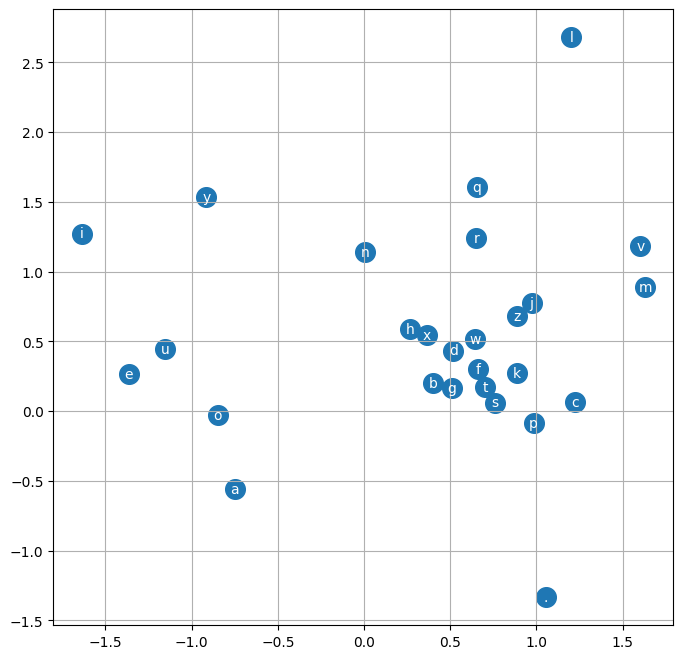

In [217]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [218]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

careah.
ami.
hevi.
kemri.
reaty.
salan.
kenrahnen.
den.
art.
kaqei.
neamara.
chaiiv.
kaleig.
dham.
join.
qei.
tasroilea.
jadia.
wazeloniearyni.
jacenni.
